## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/57/e5/c0a26615f1d0b7da047af9b5e60ca899181a123e5199277025ad4567e361/yfinance-0.2.60-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.0 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 3.8 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/3.0 MB 2.6 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2

In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
# 구글 주식 데이터 로딩
goog = yf.download("NVDA", start="2005-05-04", end="2025-05-15")
goog.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2005-05-04,0.171326,0.172549,0.166283,0.166818,468816000
2005-05-05,0.174689,0.176828,0.171403,0.172320,619272000
2005-05-06,0.177057,0.177134,0.172701,0.176752,355728000
2005-05-09,0.180344,0.181566,0.176752,0.177822,745332000
2005-05-10,0.173313,0.178127,0.171326,0.178051,735120000


In [21]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,NVDA
Date,
2005-05-04,0.171326
2005-05-05,0.174689
2005-05-06,0.177057
2005-05-09,0.180344
2005-05-10,0.173313
...,...
2025-05-05,113.820000
2025-05-06,113.540001
2025-05-07,117.059998


<Axes: xlabel='Date'>

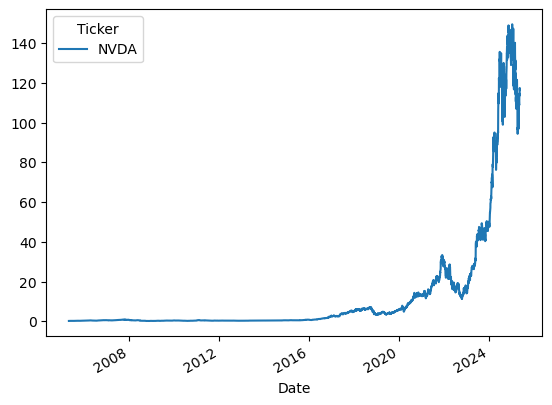

In [22]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [28]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('M').mean()
goog_downsampled

Ticker,NVDA
Date,
2005-05-31,0.192152
2005-06-30,0.209799
2005-07-31,0.207666
2005-08-31,0.221466
2005-09-30,0.248485
...,...
2025-01-31,135.710019
2025-02-28,130.342749
2025-03-31,114.919890


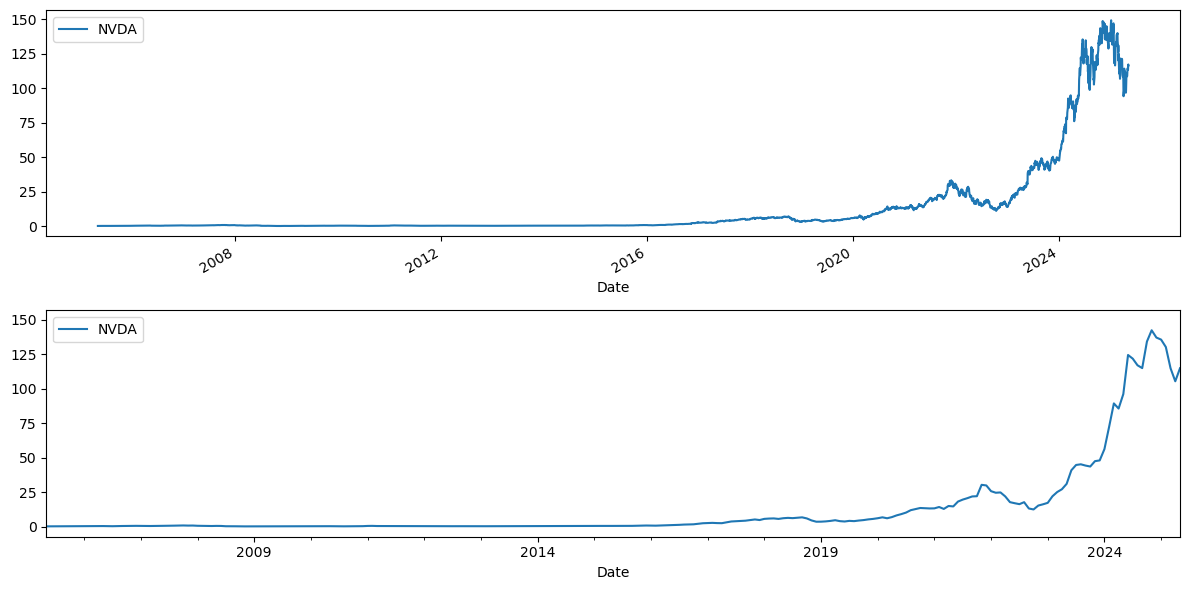

In [29]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Axes(0.125,0.11;0.775x0.77)


[]

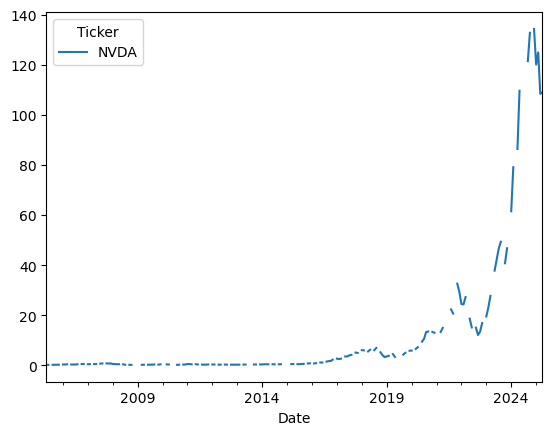

In [32]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('M').plot()
print(goog_downsampled)

goog_downsampled.plot()

In [34]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()
print(goog_upsampled)

Ticker                     NVDA
Date                           
2005-05-04 00:00:00    0.171326
2005-05-04 12:00:00         NaN
2005-05-05 00:00:00    0.174689
2005-05-05 12:00:00         NaN
2005-05-06 00:00:00    0.177057
...                         ...
2025-05-07 00:00:00  117.059998
2025-05-07 12:00:00         NaN
2025-05-08 00:00:00  117.370003
2025-05-08 12:00:00         NaN
2025-05-09 00:00:00  116.650002

[14621 rows x 1 columns]


#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [35]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Ticker,NVDA
Date,
2005-05-04,NaN
2005-05-05,NaN
2005-05-06,NaN
2005-05-09,NaN
2005-05-10,NaN
...,...
2025-05-05,20.703115
2025-05-06,19.695013
2025-05-07,20.412664


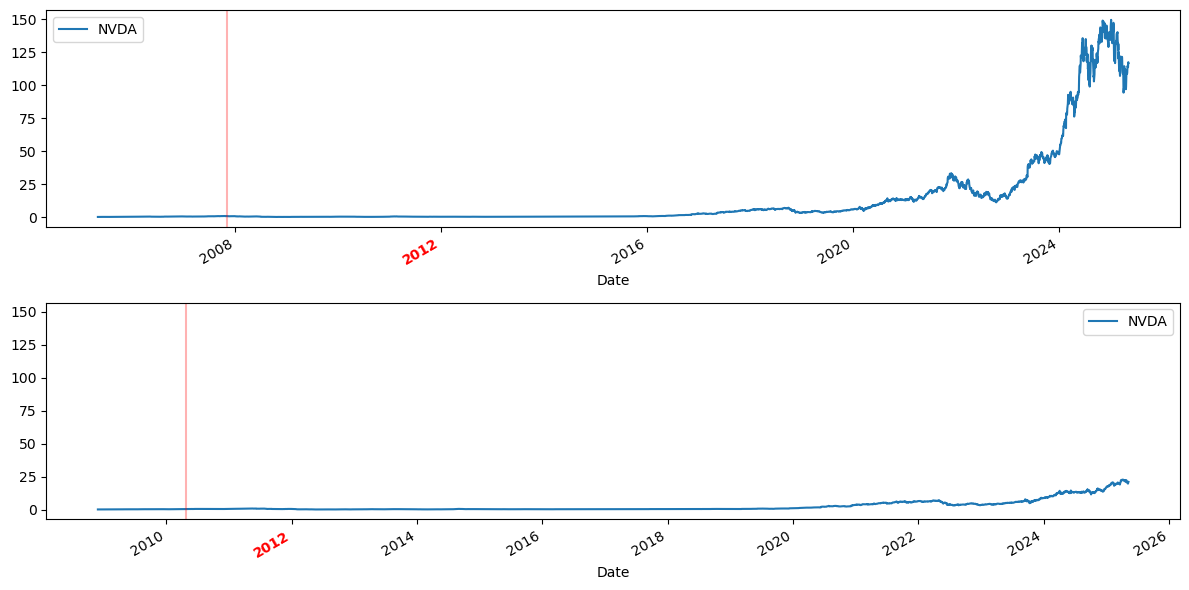

In [36]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [37]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted) / goog_shifted # [+] 주가 변화율 계산

Ticker,NVDA
Date,
2005-05-04,NaN
2005-05-05,0.019627
2005-05-06,0.013559
2005-05-09,0.018562
2005-05-10,-0.038985
...,...
2025-05-05,-0.005939
2025-05-06,-0.002460
2025-05-07,0.031002


Ticker            NVDA
Date                  
2005-05-04         NaN
2005-05-05    0.346015
2005-05-06    0.351746
2005-05-09    0.357401
2005-05-10    0.353657
...                ...
2025-05-05  228.320000
2025-05-06  227.360001
2025-05-07  230.599998
2025-05-08  234.430000
2025-05-09  234.020004

[5037 rows x 1 columns]


<Axes: xlabel='Date'>

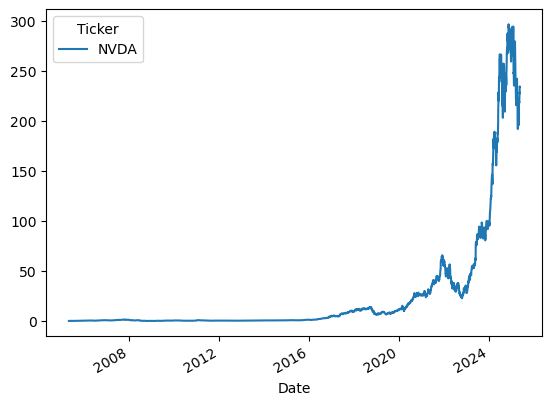

In [38]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog + goog_shifted  # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

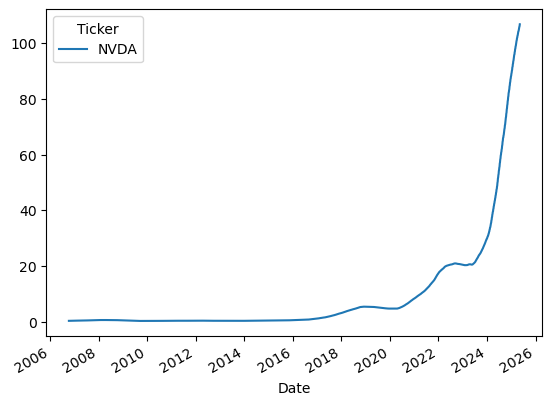

In [39]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

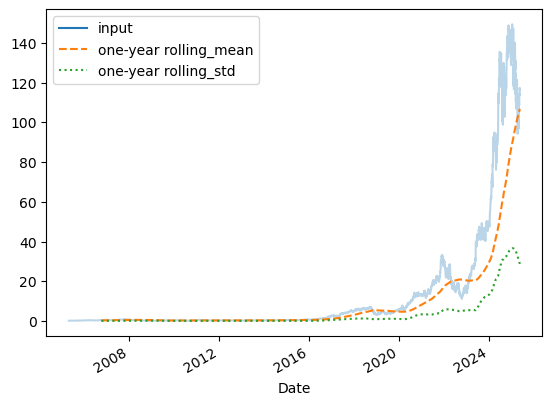

In [40]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)